# Multiple linear regression

This notebook shows an example of multiple linear regression using Stochastic Gradient Descent.

We use the [employee salaries dataset](https://www.kaggle.com/datasets/yasserh/employee-salaries-datatset) stored in `data/salary.csv`. The dataset contains the following columns:
- Gender: 0-Female, 1-Male.
- Age: Age of the employee (years).
- PhD: Whether the person has a PhD (0-No, 1-Yes).
- Salary (dependent variable / target): Salary of the employee (in K USD per year).

In [14]:
# make sure the required packages are installed
%pip install numpy pandas scikit-learn matplotlib seaborn --quiet

# import the required modules
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler

import utils

random_state = 42

Note: you may need to restart the kernel to use updated packages.


## Data preparation

We load the dataset from the file, split in train and test sets, scale the required columns, and visualize the correlations between the features and the target variable.

Description of the training set before scaling:
          Gender        Age       PhD
count  80.000000  80.000000  80.00000
mean    0.475000  45.825000   0.33750
std     0.502525  14.873964   0.47584
min     0.000000  20.000000   0.00000
25%     0.000000  30.000000   0.00000
50%     0.000000  49.000000   0.00000
75%     1.000000  58.250000   1.00000
max     1.000000  77.000000   1.00000

Description of the training set after scaling 'Age':
          Gender        Age       PhD
count  80.000000  80.000000  80.00000
mean    0.475000   0.453070   0.33750
std     0.502525   0.260947   0.47584
min     0.000000   0.000000   0.00000
25%     0.000000   0.175439   0.00000
50%     0.000000   0.508772   0.00000
75%     1.000000   0.671053   1.00000
max     1.000000   1.000000   1.00000


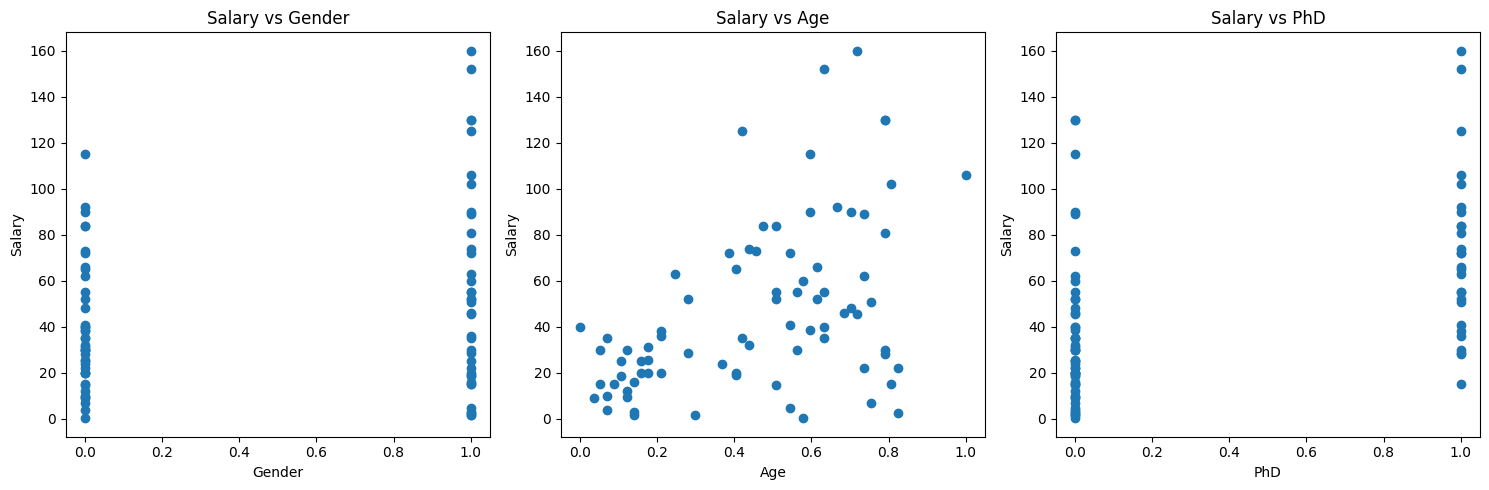

In [15]:
(X_train, y_train), (X_test, y_test) = utils.load_dataset_from_csv('data/salary.csv', ['Gender', 'Age', 'PhD'],
                                                                   'Salary', 0.2, random_state=random_state)
print("Description of the training set before scaling:")
print(X_train.describe(), end='\n\n')

# Scale X_train and X_test 'Age' feature using a Max-Min Scaler between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
X_train['Age'] = scaler.fit_transform(X_train[['Age']])
# Shows X_train after scaling
print("Description of the training set after scaling 'Age':")
print(X_train.describe(), end='\n\n')
# Important: Use the same scaler that was used for X_train, without fitting again
X_test['Age'] = scaler.transform(X_test[['Age']])

# Visualize the correlation between the features in X_train and the target variable y_train
# We can see the influence of each feature on the target variable.
utils.visualize_correlation(X_train, y_train, n_plot_columns=3)

## ✨ Questions ✨
1. Do you see any correlation between `Gender` and the target variable?
2. Do you see any correlation between `Age` and the target variable?
3. Do you see any correlation between `PhD` and the target variable?

### Answers

*Write your answers here.*
1. Male gender seems to have higher salaries.
2. Older employees seem to have higher salaries.
3. PhD employees seem to have higher salaries.

## Model training and prediction

We train a multiple linear regression model using Stochastic Gradient Descent (`SGDRegressor`) and predict the salaries for the test set.

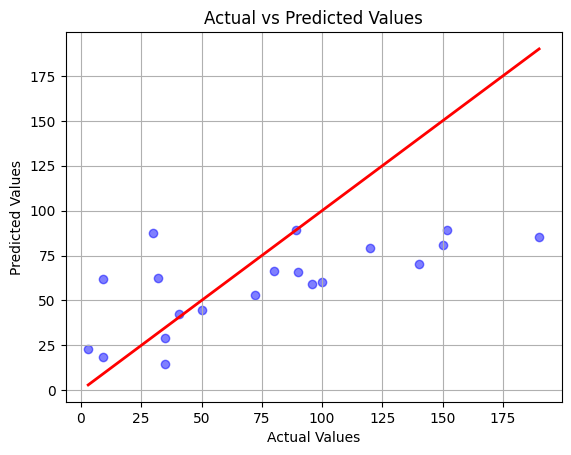

In [16]:
# model training
model = SGDRegressor(random_state=random_state)
model.fit(X_train, y_train)
# predict the values for the test set
y_pred = model.predict(X_test)
utils.plot_actual_vs_predicted_values(y_test, y_pred)

## Model evaluation

Let's evaluate the model with the test set using the MSE, RMSE, MAE, and R-squared metrics. 

In [17]:
mse, rmse, mae, r2 = utils.evaluate_regression(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared determination coefficient: {r2:.4f}', end='\n\n')

Mean Squared Error (MSE): 1917.9939
Root Mean Squared Error (RMSE): 43.7949
Mean Absolute Error (MAE): 34.2402
R-squared determination coefficient: 0.3065


## Model interpretation

We can interpret the model by analyzing the coefficients of the features.

In [18]:
# Shows the intercept of the model
print(f"Intercept of the model: {model.intercept_[0]}.")
# Shows the coefficients of the model, indicating its name and the importance of each feature
coefficients = dict(zip(X_train.columns, model.coef_))
print(f"Coefficients of the model: {coefficients}.")

Intercept of the model: 12.826785917952524.
Coefficients of the model: {'Gender': 8.442322154660527, 'Age': 45.59454462481873, 'PhD': 27.33044836637919}.


## ✨ Questions ✨
4. Does the model achieve a high performance?
5. How could you answer the previous question more objectively (using a metric)?
6.Why is not the evaluated performance very high?
7. What is the variable that influences the salary the most?
8. Is that influence positive or negative?
9. What is the influence of the rest of the variables?

### Answers

*Write your answers here.*

4. The model does not perform well. The predicted values are far from the actual values.
5. We could use the R-squared determination coefficient. The value is close to 0, which means that the model does not explain much variability of the dependent value.
6. Because a linear model cannot capture the relationship between the features and the target variable.
7. The `Age` variable is the most influential, as it has the highest coefficient.
8. The influence is positive. Greater age implies a higher salary.
9. All of them influence positively. None of them are close to zero (no influence). `PhD` influences more than `Gender` in the Salary.